In [156]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os 
from collections import Counter
from itertools import chain
import math

In [157]:
# Load the data from each sheet into a DataFrame
data_respostas = pd.read_excel('Base - Pesquisa de Mercado.xlsx', sheet_name=0)
data_roteiro = pd.read_excel('Base - Pesquisa de Mercado.xlsx', sheet_name=1)

data_respostas.head(), data_roteiro.head()

(   Qfreq   P2  P3   P4   P5   P6   P7   P8   P9 P12  ...  P24  P25  P26  Qesc  \
 0      4  NaN NaN  7.0  2.0  7.0  7.0  1.0  1.0   1  ...  3.0  7.0  7.0     3   
 1      4  NaN NaN  5.0  1.0  1.0  3.0  5.0  4.0   1  ...  6.0  6.0  4.0     5   
 2      2  NaN NaN  6.0  1.0  6.0  3.0  6.0  1.0   1  ...  7.0  7.0  7.0     4   
 3      1  NaN NaN  2.0  1.0  2.0  2.0  2.0  1.0   2  ...  NaN  NaN  NaN     3   
 4      1  NaN NaN  7.0  7.0  7.0  2.0  7.0  7.0   1  ...  7.0  7.0  7.0     4   
 
    Qciv  Qocup  Qgen  Qid  Qreg  Qclasse  
 0     2    3.0   1.0   31     3        5  
 1     1    3.0   1.0   59     4        3  
 2     1    2.0   1.0   20     2        3  
 3     2    2.0   1.0   24     1        5  
 4     1    3.0   1.0   40     4        5  
 
 [5 rows x 31 columns],
    Unnamed: 0 Unnamed: 1         Unnamed: 2  \
 0         NaN   Variável               Tipo   
 1         NaN      Qfreq     Resposta Única   
 2         NaN         P2  Resposta Múltipla   
 3         NaN         P

In [158]:
# Frequency of responses for the first question 'Qfreq'
response_freq = data_respostas['Qfreq'].value_counts()

# Total number of responses for the first question 'Qfreq'
total_responses = data_respostas['Qfreq'].count()

response_freq, total_responses

(5    363
 1    165
 2     76
 4     51
 3     47
 Name: Qfreq, dtype: int64,
 702)

In [159]:
# Split the DataFrame into two based on the response to 'Qfreq'
responded_5 = data_respostas[data_respostas['Qfreq'] == 5]
not_responded_5 = data_respostas[data_respostas['Qfreq'] != 5]

responded_5.head(), not_responded_5.head()

(    Qfreq     P2   P3  P4  P5  P6  P7  P8  P9  P12  ... P24 P25  P26  Qesc  \
 7       5      2  7.0 NaN NaN NaN NaN NaN NaN  NaN  ... NaN NaN  NaN     4   
 10      5      2  7.0 NaN NaN NaN NaN NaN NaN  NaN  ... NaN NaN  NaN     3   
 14      5  1;3;4  2.0 NaN NaN NaN NaN NaN NaN  NaN  ... NaN NaN  NaN     4   
 15      5      1  5.0 NaN NaN NaN NaN NaN NaN  NaN  ... NaN NaN  NaN     3   
 17      5      7  6.0 NaN NaN NaN NaN NaN NaN  NaN  ... NaN NaN  NaN     4   
 
     Qciv  Qocup  Qgen  Qid  Qreg  Qclasse  
 7      1    3.0   1.0   19     4        5  
 10     1    5.0   1.0   18     3        5  
 14     1    4.0   1.0   21     3        5  
 15     1    3.0   1.0   16     4        5  
 17     2    2.0   1.0   22     2        5  
 
 [5 rows x 31 columns],
    Qfreq   P2  P3   P4   P5   P6   P7   P8   P9 P12  ...  P24  P25  P26  Qesc  \
 0      4  NaN NaN  7.0  2.0  7.0  7.0  1.0  1.0   1  ...  3.0  7.0  7.0     3   
 1      4  NaN NaN  5.0  1.0  1.0  3.0  5.0  4.0   1  ...  6.0  

In [160]:
# Split the DataFrame 'not_responded_5' into two based on the response to 'P12'
responded_1_P12 = not_responded_5[not_responded_5['P12'] == 1]
responded_2_P12 = not_responded_5[not_responded_5['P12'] == 2]

responded_1_P12.head(), responded_2_P12.head()

(   Qfreq   P2  P3   P4   P5   P6   P7   P8   P9 P12  ...  P24  P25  P26  Qesc  \
 0      4  NaN NaN  7.0  2.0  7.0  7.0  1.0  1.0   1  ...  3.0  7.0  7.0     3   
 1      4  NaN NaN  5.0  1.0  1.0  3.0  5.0  4.0   1  ...  6.0  6.0  4.0     5   
 2      2  NaN NaN  6.0  1.0  6.0  3.0  6.0  1.0   1  ...  7.0  7.0  7.0     4   
 4      1  NaN NaN  7.0  7.0  7.0  2.0  7.0  7.0   1  ...  7.0  7.0  7.0     4   
 5      1  NaN NaN  1.0  1.0  1.0  4.0  3.0  1.0   1  ...  7.0  7.0  7.0     6   
 
    Qciv  Qocup  Qgen  Qid  Qreg  Qclasse  
 0     2    3.0   1.0   31     3        5  
 1     1    3.0   1.0   59     4        3  
 2     1    2.0   1.0   20     2        3  
 4     1    3.0   1.0   40     4        5  
 5     2    4.0   1.0   54     4        1  
 
 [5 rows x 31 columns],
     Qfreq   P2  P3   P4   P5   P6   P7   P8   P9 P12  ... P24 P25  P26  Qesc  \
 3       1  NaN NaN  2.0  1.0  2.0  2.0  2.0  1.0   2  ... NaN NaN  NaN     3   
 9       1  NaN NaN  4.0  3.0  4.0  6.0  1.0  1.0   2 

In [161]:
# It seems like we are transforming the 'Qid' column into categories based on age ranges.
# Let's apply the transformation to the 'Qid' column of the 'responded_1_P12' DataFrame.

responded_1_P12 = responded_1_P12.copy()  # Create a copy to avoid SettingWithCopyWarning

i = 0
while i < len(responded_1_P12.Qid):
    if responded_1_P12.Qid.iat[i] > 6:
        if responded_1_P12.Qid.iat[i] < 18:
            responded_1_P12.Qid.iat[i] = 1
        elif responded_1_P12.Qid.iat[i] < 25:
            responded_1_P12.Qid.iat[i] = 2
        elif responded_1_P12.Qid.iat[i] < 35:
            responded_1_P12.Qid.iat[i] = 3
        elif responded_1_P12.Qid.iat[i] < 45:
            responded_1_P12.Qid.iat[i] = 4
        elif responded_1_P12.Qid.iat[i] < 55:
            responded_1_P12.Qid.iat[i] = 5
        else:
            responded_1_P12.Qid.iat[i] = 6
    i += 1

responded_1_P12['Qid'].value_counts()


2    92
3    59
4    46
5    31
6    20
1     7
Name: Qid, dtype: int64

c:\Users\Enzo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


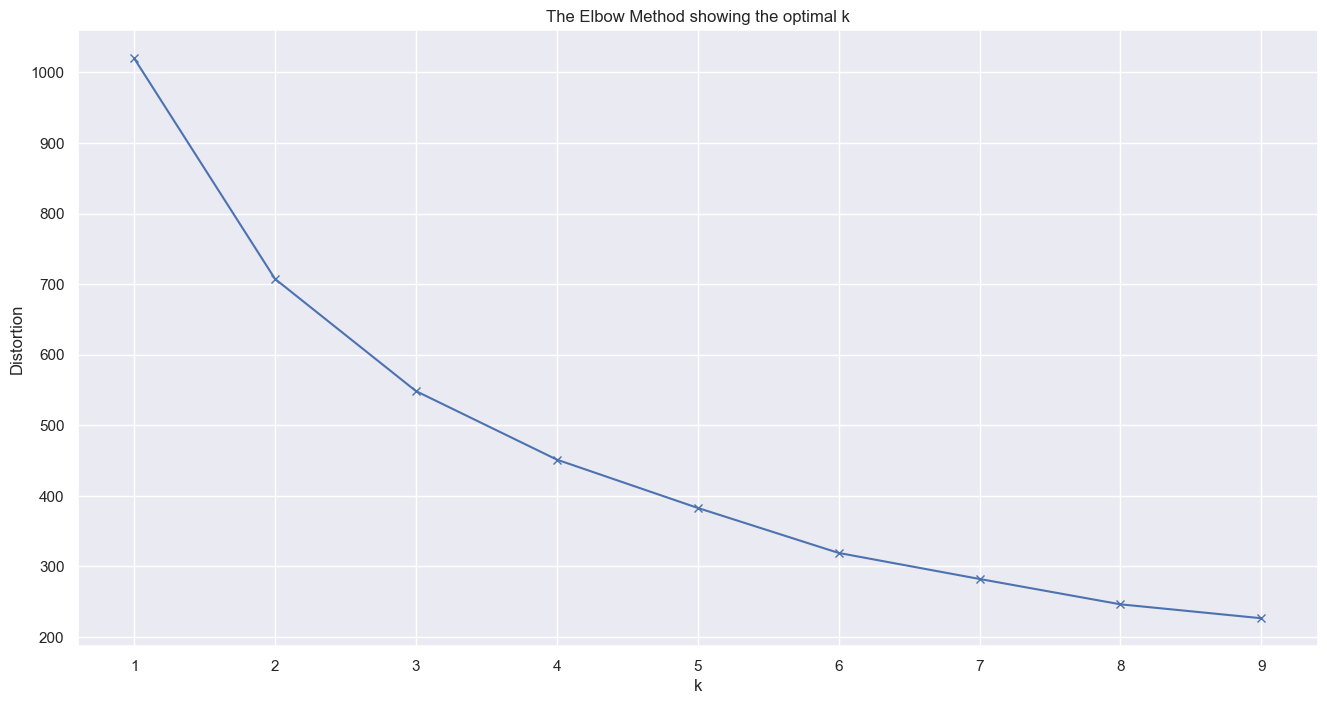

In [162]:
# Select the columns for clustering
selected_columns = ['P15', 'P19', 'P22', 'Qfreq']
data_cluster = responded_1_P12[selected_columns].dropna()

# Normalize the data
scaler = StandardScaler()
data_cluster_normalized = scaler.fit_transform(data_cluster)

# Determine the number of clusters using the elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_cluster_normalized)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [163]:
# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
data_cluster['cluster'] = kmeans.fit_predict(data_cluster_normalized)

# Show the first few rows of the DataFrame with the cluster assignments
data_cluster.head()


,P15,P19,P22,Qfreq,cluster
0,7.0,7.0,7.0,4,2
1,6.0,6.0,4.0,4,2
2,1.0,7.0,7.0,2,0
4,7.0,7.0,7.0,1,1
5,7.0,7.0,7.0,1,1


In [164]:
# Generate summary statistics for each cluster
cluster_summary = data_cluster.groupby('cluster').agg(['mean', 'std', 'count'])

cluster_summary


P15                       P19                       P22  \
             mean       std count      mean       std count      mean   
cluster                                                                 
0        3.942857  1.768367    70  3.257143  1.674062    70  3.600000   
1        6.580645  0.722426   124  5.774194  1.690907   124  6.072581   
2        6.163934  1.240703    61  5.868852  1.521791    61  5.754098   

                            Qfreq                  
              std count      mean       std count  
cluster                                            
0        1.591645    70  1.700000  0.890367    70  
1        1.217577   124  1.354839  0.480405   124  
2        1.689731    61  3.672131  0.473333    61

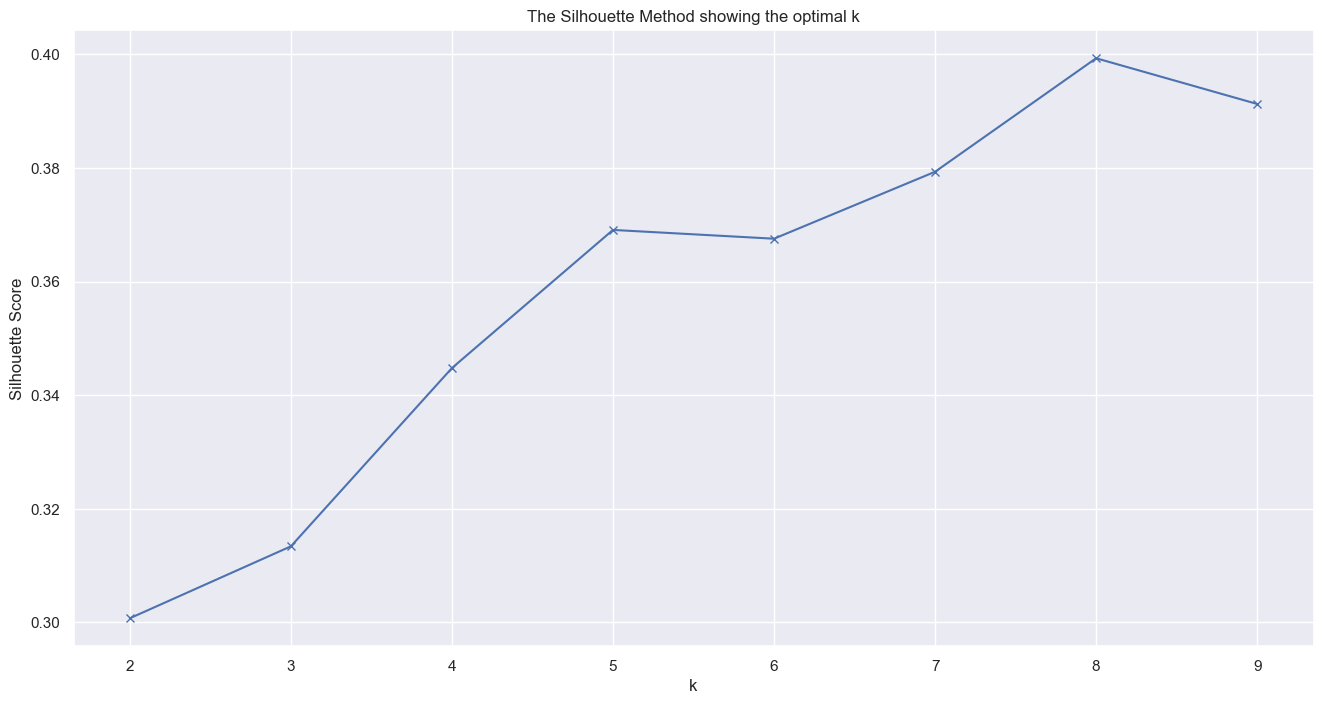

In [165]:
# Determine the silhouette score for different number of clusters
silhouette_scores = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_labels = kmeanModel.fit_predict(data_cluster_normalized)
    silhouette_avg = silhouette_score(data_cluster_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(16,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()